In [1]:
from matplotlib import pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from mpl_toolkits.axes_grid1 import make_axes_locatable
import IPython.display as ipd
import numpy as np
%matplotlib notebook
from scipy.signal import lfilter

# Phasor - sin wave와 같은 소리를 만들기

#### amp = 진폭의 범위
#### sr(Hz) = sampling rate, 1초가 몇개로 쪼개지는가, 몇개의 rate으로 이루어지는가
#### dur = 진행할 시간
#### freq(Hz) = 함수가 1초동안 몇번동안 반복되는가

#### sin의 속성 : 진폭(음의 강도) 와 freq(음의 높낮이), 진폭과 freq는 독립적

In [18]:
# parameter setting
amp = 2        # range [0.0, 1.0], -1~1, -2~2
sr = 10000       # sampling rate, Hz 1초에 총 10000개의 rate을 넣는다. 1초에 숫자가 몇개있는가, 시간축
dur = 0.5      # in seconds
freq = 100     # sine frequency, 1초동안 Hz sin곡선이 몇번 반복되는가
'''
#sr과 freq는 단위는 같지만 다른 개념이다.
#모든 소리는 sin 곡선의 합이다. 다양한 freq의 sin을 조합하면 다양한 소리가 나온다. 
'''

'\n#sr과 freq는 단위는 같지만 다른 개념이다.\n#모든 소리는 sin 곡선의 합이다. 다양한 freq의 sin을 조합하면 다양한 소리가 나온다. \n'

# 시간 만들기

#### dur 초를 sr에 맞게 쪼개서 t에 배열로 만들어 저장함
#### sr = 10000, dur = 0.5 일때
##### => sr은 1초를 만개로 쪼개기 때문에 0.5초는 5000으로 쪼개진다. 따라서 t는 5000개로 쪼개진 0.5초가 된다.
#### sr = 10000, dur = 2 일때
##### => 2초가 20000개로 쪼개진다. t는 2초가 총 20000개로 쪼개진 시간이다.

In [19]:
# generate time
t = np.arange(1, sr * dur+1)/sr # 시간 만들기, 1부터 5000까지 array 0.0001초부터 0.5초까지 의 time을 만듦
t, len(t)
# *** t에는 몇개의 site가 있을까 -> 1만
# (1~ sr+1) / sr 1초를 쪼개 1만개의 time을 만들어준다. 1만개의 arrange 만분의 1초 ~ 1초
# (1 ~ sr*0.5 +1 )/2  => 만분의 1초 ~ 만분의 5000초
#  sr * dur+1 -> 
# sampling rate ( sr) 자연에서 존재하는 소리는 continuous 하다. continuous한 것을 쪼갠다. 1초에 얼마나 많이 담을까 -> sampling rate 
#소리가 4만k 이면 1초에 4만개 수치가 있으면 인간은 실제소리와 구분하지 못한다.

(array([1.000e-04, 2.000e-04, 3.000e-04, ..., 4.998e-01, 4.999e-01,
        5.000e-01]), 5000)

# phase 생성: 시간과 radian 연결

##### t에서 continuous한 값을 sr만큼 쪼갠 discrete한 점들의 배열
##### theta는 1초동안 반복하는 횟수인 freq에 맞게 sin 곡선이 그려지고 dur 에서 sr에 맞게 나눠진 점들의 배열이 된다.

In [20]:
# generate phase
#제일 중요 
#세타에도 만개의 site
theta = t * 2*np.pi * freq   # 세타 = 각도 radian
'''
시간이 각도가 될 순 없지만, 상관을 지어주기 위해 freq개념을 사용한다.
시간 -> freq -> 각도(radian)
dur = 1, freq = 1
th = t * 2 * pi 0부터 2pie가 1만개로 쪼개진 것이다.
freq = 2이면
0부터 4pie까지가 1만개로 쪼개짐
'''

'\n시간이 각도가 될 순 없지만, 상관을 지어주기 위해 freq개념을 사용한다.\n시간 -> freq -> 각도(radian)\ndur = 1, freq = 1\nth = t * 2 * pi 0부터 2pie가 1만개로 쪼개진 것이다.\nfreq = 2이면\n0부터 4pie까지가 1만개로 쪼개짐\n'

In [21]:
# generate signal by cosine-phasor
s = np.sin(theta)
#s에도 만개의 site

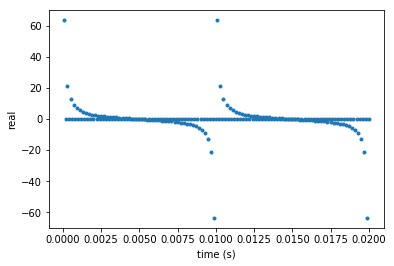

In [38]:
fig = plt.figure()
ax = fig.add_subplot(111)
#ax.plot(t[0:2*200], s[0:2*200], '.') ##중요 plot에는 theta가 쓰이지 않는다.  plot에서 점 개수는 만개 100번째의 t값과 theta값을 알 수 있다.
#sr이 달라지더라도 그래프에 나오는 점의 개수는 같지만 시간이 달라진다. 
# x, y의 벡터의 길이가 같아야 될까 -> 같아야된다.
# 점의 총 개수는 200개
# n번째 점이 (x,y)이 무엇인가 x = t의 n번째 값, y = s의 n번째 값
# 0에서 100 중에서 7이 빠지는 indexing 방법? 주관식
#200 앞에 2가 곱해져서 200일때 점들을 한번씩 점프하면서 선택
ax.plot(t[0:200], s[0:200], '.')
ax.set_xlabel('time (s)')
ax.set_ylabel('real')
ipd.Audio(s, rate = sr) 

# Complex-phasor

In [24]:
# generate signal by complex-phasor
c = amp*np.exp(theta*1j) #  theta*1j 는 지수 j는 복소수 i이다. c는 복소수(complex number) ,theta는 동일하므로 위의 sr과 같다.
'''
t : 0.0001 ... 1
theta = 0.000pie ... 2 pie(when freq = 1 hz)
t -> convert -> theta

e^(theta * i) -> i = 1j 는 복소수, e는 exponetial
sin(theta)를 바꾼다. e^(theta)

i = a +bi a를 실수축에, b를 허수축으로 생각해서 plot 가능
b = 0이면 real num, 실수다.
'''

'\nt : 0.0001 ... 1\ntheta = 0.000pie ... 2 pie(when freq = 1 hz)\nt -> convert -> theta\n\ne^(theta * i) -> i = 1j 는 복소수, e는 exponetial\nsin(theta)를 바꾼다. e^(theta)\n\ni = a +bi a를 실수축에, b를 허수축으로 생각해서 plot 가능\nb = 0이면 real num, 실수다.\n'

Text(0.5, 0, 'imag')

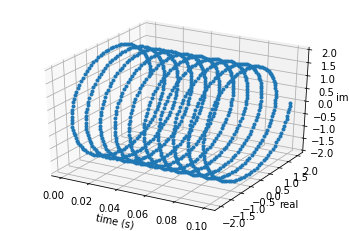

In [25]:
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.plot(t[0:1000], c.real[0:1000], c.imag[0:1000], '.') # 중요중요중요
'''x = time, y= a = c.real , z = b = c.imag (a+bi) 
    x가 time , y가 imag 이면 sin으로 보인다.
    x가 time , y가 real 이면 cos으로 보인다.
    sin 과 cos이 모두 나타나서 더 유용하다.
    
    시간이 없이 sin wave를 만들 수 있지만, 시간이 있어야 play를 할 수 있는 실체가 생긴다.
    time 만들고 phase(theta)만들고 signal(s)를 만든다.
    이 세상 소리는 다양한 모양의 sin wave들의 합이다. (amp가 다르거나 freq가 다름)
    sound는 vector, signal에는 시간의 개념이 들어간다.
    time series temporal trajectory, signal => 시간이 들어간것 
'''
ax.set_xlabel('time (s)')
ax.set_ylabel('real')
ax.set_zlabel('imag')
# 
'''
모든 시그널은 play가 된다. 기상 신호가 signal이어도 play가 된다. 주식의 흐름도 play가 된다.
모든 signal은 다양한 sin wave 들의 합이다.
주식시장도 다양한 sin wave들의 합

'''

In [74]:
ipd.Audio(s, rate=sr)

In [34]:
F0 = 100; Fend = int(sr/2); s = np.zeros(len(t)); #F는 주파수
for i in range(F0, Fend+1, F0):
    print(i)

100
200
300
400
500
600
700
800
900
1000
1100
1200
1300
1400
1500
1600
1700
1800
1900
2000
2100
2200
2300
2400
2500
2600
2700
2800
2900
3000
3100
3200
3300
3400
3500
3600
3700
3800
3900
4000
4100
4200
4300
4400
4500
4600
4700
4800
4900
5000


# Generate pulse train

SyntaxError: illegal target for annotation (<ipython-input-36-c2f5fa78edcf>, line 1)

'\n이것도 sin wave들의 합이다.\n합쳐지면 이 소리가 난다.\n'

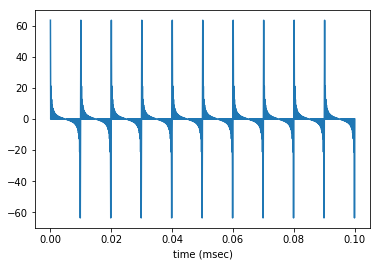

In [35]:
# generate samples, note conversion to float32 array

for freq in range(F0, Fend+1, F0):# 100부터 5000까지 50번
    theta = t * 2*np.pi * freq
    tmp = amp * np.sin(theta)
    s = s + tmp # 기존거에 계속 plus plus
fig = plt.figure()
ax = fig.add_subplot(111)
ax.plot(t[0:1000], s[0:1000]); 
ax.set_xlabel('time (msec)')
ipd.Audio(s, rate=sr)
'''
이것도 sin wave들의 합이다.
합쳐지면 이 소리가 난다.
'''

In [79]:
def hz2w(F, sr):
    NyFreq = sr/2;
    w = F/NyFreq *np.pi;
    return w

def resonance (srate, F, BW):
    a2 = np.exp(-hz2w(BW,srate))
    omega = F*2*np.pi/srate
    a1 = -2*np.sqrt(a2)*np.cos(omega)
    a = np.array([1, a1, a2])
    b = np.array([sum(a)])
    return a, b

In [126]:
RG = 0  # RG is the frequency of the Glottal Resonator
BWG = 100  # BWG is the bandwidth of the Glottal Resonator
a, b=resonance(sr,RG,BWG)
s = lfilter(b, a, s, axis=0)
ipd.Audio(s, rate=sr)

In [127]:
RG = 500  # RG is the frequency of the Glottal Resonator
BWG = 60  # BWG is the bandwidth of the Glottal Resonator
a, b=resonance(sr,RG,BWG)
s = lfilter(b, a, s, axis=0)
ipd.Audio(s, rate=sr)

In [128]:
RG = 1500  # RG is the frequency of the Glottal Resonator
BWG = 200  # BWG is the bandwidth of the Glottal Resonator
a, b=resonance(sr,RG,BWG)
s = lfilter(b, a, s, axis=0)
ipd.Audio(s, rate=sr)

In [129]:
RG = 2500  # RG is the frequency of the Glottal Resonator
BWG = 200  # BWG is the bandwidth of the Glottal Resonator
a, b=resonance(sr,RG,BWG)
s = lfilter(b, a, s, axis=0)
ipd.Audio(s, rate=sr)

In [130]:
RG = 3500  # RG is the frequency of the Glottal Resonator
BWG = 200  # BWG is the bandwidth of the Glottal Resonator
a, b=resonance(sr,RG,BWG)
s = lfilter(b, a, s, axis=0)
ipd.Audio(s, rate=sr)

In [131]:
s = lfilter(np.array([1, -1]), np.array([1]), s)
ipd.Audio(s, rate=sr)

# load wav

In [132]:
from scipy.io import wavfile
# sr, s = wavfile.read('a.wav')
nSamp = len(s)
dur = nSamp / sr
t = np.linspace(1/sr, dur, nSamp)

# Fourier tranform

In [133]:
nFFT = nSamp
amp = [];
for n in range(0,nFFT):
    omega = 2*np.pi*n/nFFT # angular velocity
    z = np.exp(omega*1j)**(np.arange(0,nSamp))
    amp.append(np.abs(np.dot(s,z)))

<IPython.core.display.Javascript object>


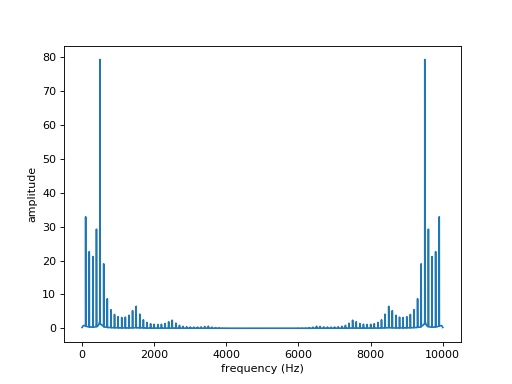

Text(0, 0.5, 'amplitude')

In [134]:
fig = plt.figure()
ax = fig.add_subplot(111)
freq = np.arange(1,nFFT+1)*sr/nFFT;
ax.plot(freq, amp)
ax.set_xlabel('frequency (Hz)')
ax.set_ylabel('amplitude')

# define helper functions

In [100]:
def frame_signal(signal, srate, win_size, win_step):
    frame_size = int(win_size * srate)
    frame_step = int(win_step * srate)

    # Get number of frames
    num_frames = int(np.ceil(np.abs(len(signal) - frame_size) / frame_step))
    # Pad signal
    pad_len = num_frames * frame_step + frame_size
    pad = np.zeros((pad_len - len(signal)))
    signal_padded = np.append(signal, pad)
    # Get within-frame sample indices
    idx1 = np.tile(np.arange(0, frame_size), (num_frames, 1))
    # Get vectors of frame_step increments
    idx2 = np.tile(np.arange(0, num_frames * frame_step, frame_step),
                   (frame_size, 1)).T
    # Get total indices divided by each frame
    indices = idx1 + idx2
    # Get frames divided by each frame based on indices
    frames = signal_padded[indices.astype(np.int32, copy=False)]
#     if cutoff is not None:
#         cutoff_bin = round(cutoff * nfft / (srate))  # hz -> bin
#         frames = frames[:, :cutoff_bin]
    return frames

def get_window(win_size, srate, win_type, win_samp=None):
    '''Get window samples for win_size'''
    if win_samp is None:
        win_samp = int(win_size * srate)  # sec -> sample

    if win_type == 'rect':
        return np.kaiser(win_samp, 0)
    elif win_type == 'hamming':
        return np.hamming(win_samp)
    elif win_type == 'hanning':
        return np.hanning(win_samp)
    elif win_type == 'kaiser':
        return np.kaiser(win_samp, 14)
    elif win_type == 'blackman':
        return np.blackman(win_samp)

def plot_spectrogram(S):
    fig, ax = plt.subplots(facecolor='white', figsize=(14, 6))
    im = ax.imshow(S.T, aspect='auto', origin='lower', cmap=plt.get_cmap('Greys'))
    divider = make_axes_locatable(ax)
    cax = divider.append_axes('right', size='5%', pad=0.05)
    cbar = fig.colorbar(im, cax=cax)
    return fig, ax

def preemphasis(s, pre_emp=0.97):
    # Emphasize high frequency range of the waveform by increasing power(squared amplitude).
    s = lfilter([1, -pre_emp], [1], s)
    return s

# preprocessing signal

In [101]:
max_freq = None  # cutoff freq
win_size = 0.008 # sec
win_step = 0.001  # sec
win_type = 'hanning' # options: 'rect', 'hamming', 'hanning', 'kaiser', 'blackman'
nfft = 1024

# Emphasize signal
s = preemphasis(s)
# Frame signal
frames = frame_signal(s, sr, win_size, win_step)
# Apply window function
frames *= get_window(win_size, sr, win_type)
print('frames:', frames.shape)

frames: (492, 80)


(<Figure size 1008x432 with 2 Axes>,
 <matplotlib.axes._subplots.AxesSubplot at 0x1c2140e358>)

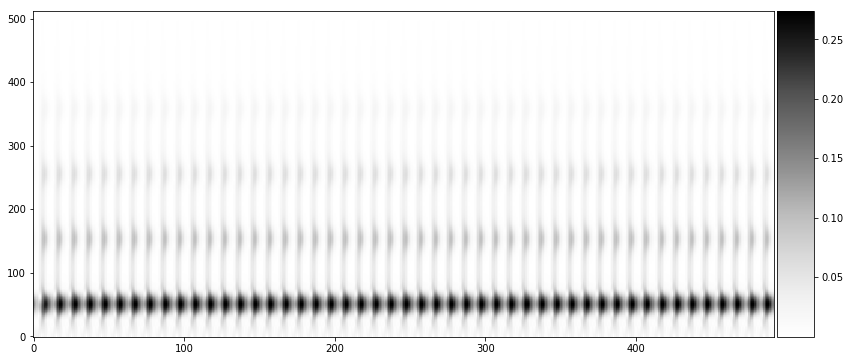

In [102]:
magspec = np.abs(np.fft.rfft(frames, n=nfft)) # frames x (nfft//2 + 1)
plot_spectrogram(magspec)

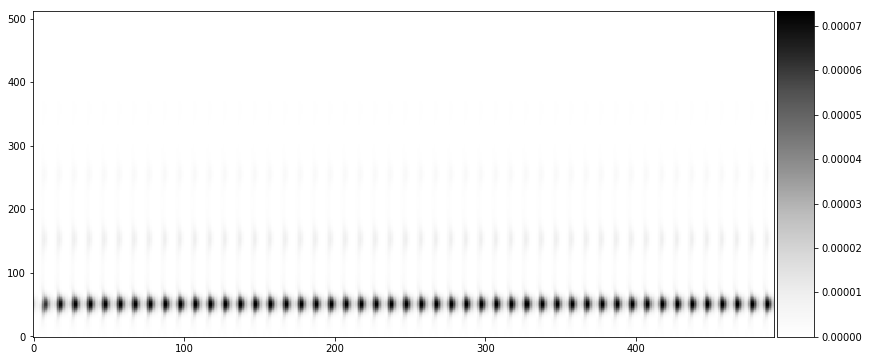

In [103]:
powspec = 1/nfft * (magspec**2)
plot_spectrogram(powspec);

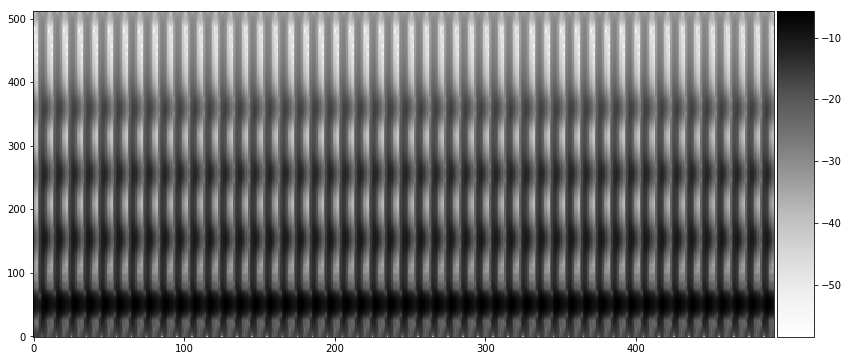

In [104]:
logspec = 10 * np.log10(magspec) # dB scale
plot_spectrogram(logspec);

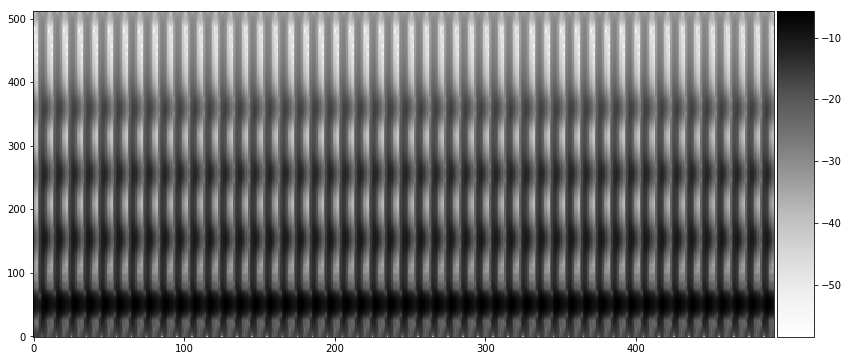

In [105]:
logspec = 10 * np.log10(magspec) # dB scale
plot_spectrogram(logspec);